# Итоговая работа.

In [148]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [149]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [154]:
import sklearn.metrics as skm

In [155]:
pairs = []
for i in range(raitings.shape[0]):
    pair =[0,0]
    pair[0] = i
    for k in range(raitings.shape[0]):
        if k!=i:
            dist1 = skm.pairwise_distances([raitings[i],raitings[k]], metric='correlation')[0][1]
            if k > 0:
                dist2 = skm.pairwise_distances([raitings[i],raitings[k-1]], metric='correlation')[0][1]
                if dist1<dist2:
                    pair[1] = k
            else:
                pair[1] = k
    pairs.append(pair)

### Ответ:

In [156]:
pairs

[[0, 8],
 [1, 6],
 [2, 9],
 [3, 9],
 [4, 8],
 [5, 9],
 [6, 3],
 [7, 5],
 [8, 6],
 [9, 8]]


**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [157]:
import sklearn.decomposition as skd

### Используем для нахождения решения Метод главных компонент

In [158]:
raitings_t = raitings.transpose()

In [159]:
pca = skd.PCA(n_components=5)
res = pca.fit(raitings_t)

In [160]:
res.components_.shape

(5, 10)

In [161]:
res_t = res.components_.transpose()

Ответ - результирующая матрица 10x5:

In [163]:
res_t

array([[-0.31358117,  0.25476945,  0.19083908, -0.21852297, -0.60245219],
       [ 0.3183522 ,  0.08797986, -0.28039111, -0.69901139,  0.05207337],
       [-0.39842075, -0.33594044, -0.12926785, -0.35226532, -0.07047864],
       [ 0.1931435 , -0.467029  ,  0.24678578, -0.29060791, -0.24058591],
       [ 0.06775794,  0.5158211 , -0.43943666, -0.08501525,  0.09401811],
       [ 0.16034486, -0.314959  , -0.67517295,  0.26343614, -0.18599837],
       [ 0.62693275,  0.08089786,  0.36874421,  0.11698808,  0.04529902],
       [ 0.28148124, -0.11655789, -0.14584713,  0.23289713, -0.62204756],
       [-0.15598735,  0.39127865,  0.03216844,  0.18804452, -0.29591552],
       [-0.278146  , -0.24058312, -0.01031015,  0.27417652,  0.22692497]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

Производная, вычисленная вручную:

$2sin(sin(x) + cos(2x+3))*1/(cos^3(sin(x) + cos(2x+3)))*(cos(x)-2*sin(2x+3))$

Значение в заданной точке:

In [187]:
from math import sin, cos, tan

In [188]:
x = 1

In [189]:
df = (2*sin(sin(1)+cos(5))/((cos(sin(1)+cos(5)))**3))*(cos(1)-2*sin(5))
df

55.385917635337854

Производная, вычисленная с помощью python:

In [190]:
from scipy.misc import derivative

In [191]:
def f(x):
    return (tan(sin(x) + cos(2*x+3)))**2

In [192]:
derivative(f, 1.0, dx=1e-6)

55.3859176464222

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [309]:
from scipy.optimize import minimize 

In [310]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [311]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [312]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

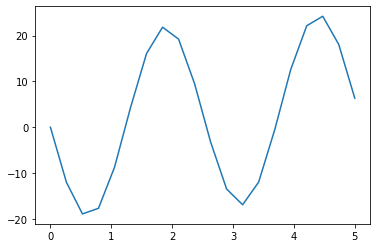

In [313]:
plt.plot(x, fx)
plt.show()

In [314]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [315]:
ab0 = [10,10]

In [316]:
res = minimize(error,ab0,method ='nelder-mead',options = {'xtol':1e-8,'disp':True})

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 81
         Function evaluations: 162


In [317]:
res

 final_simplex: (array([[ 3.        , 21.37610416],
       [ 3.00000001, 21.37610417],
       [ 3.        , 21.37610416]]), array([1.32511774e-05, 1.34214438e-05, 1.34725009e-05]))
           fun: 1.325117738648629e-05
       message: 'Optimization terminated successfully.'
          nfev: 162
           nit: 81
        status: 0
       success: True
             x: array([ 3.        , 21.37610416])

In [318]:
f(x, res.x[0], res.x[1])

array([  0.        , -12.01819254, -18.90968628, -17.68786494,
        -8.75291106,   4.2752469 ,  16.06801302,  21.81250228,
        19.22059875,   9.48411069,  -3.22272981, -13.48576561,
       -16.9109636 , -11.95866758,  -0.58630193,  12.56873904,
        22.12489363,  24.20292121,  18.04522624,   6.33211023])

In [319]:
fx

array([  0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092])

Оптимальные параметры: a = 3,b = 21.37610416

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [359]:
import matplotlib.pyplot as plt

In [360]:
 rand_val = np.random.randint(low = 1,high = 50, size=20)

In [361]:
rand_val

array([44, 26,  5,  3, 19,  9,  6, 19, 24, 15,  5, 18, 33,  6, 27,  5,  8,
        9, 15, 17])

In [362]:
choices_mean = []

In [363]:
for i in range(0,1000):
    choices_mean.append(np.mean(np.random.choice(rand_val, 50)))

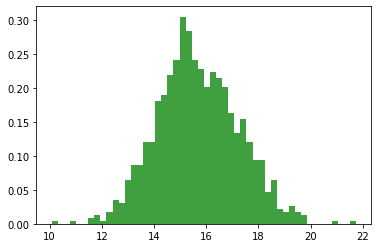

In [366]:
# the histogram of the data
n, bins, patches = plt.hist(choices_mean, 50, density=True, facecolor='g', alpha=0.75)

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [370]:

m = np.array([[1, 4],
              [1, 1]])
print(m)



[[1 4]
 [1 1]]


In [375]:
m_eig = np.array([['1-a', '4'],
              ['1', '1-a']])
print(m_eig)

[['1-a' '4']
 ['1' '1-a']]


Решаем уравнение $a^2-2a-3 = 0$ через дискриминант и получаем решения:[3,-1]

Тогда собственные значения: [3,-1]

In [373]:
np.linalg.eig(m)


(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))